# Allstate Claims Severity

You can get the detailed information and download the data from the following link:<br/>
https://www.kaggle.com/c/allstate-claims-severity


## $Claim$: The work below is partially relied on the workflow provided by the 2nd Place Winner's Interview: Alexey Noskov. I did not copy any of Mr. Noskov's codes, however, I followed his ideas on how to tackle this kaggle competition in steps. Afterall, I learned so much from Mr. Noskov.  And the Exploratory data analysis plan below is provided by  : Santhosh SharmaExploratory study on ML algorithms  

http://blog.kaggle.com/2017/02/27/allstate-claims-severity-competition-2nd-place-winners-interview-alexey-noskov/


https://www.kaggle.com/sharmasanthosh/exploratory-study-on-ml-algorithms


Data statistics
* Shape
* Peek
* Description
* Skew

Transformation
* Correction of skew

Data Interaction
* Correlation
* Scatter plot

Data Visualization
* Box and density plots
* Grouping of one hot encoded attributes

Data Preparation
* One hot encoding of categorical data
* Test-train split

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

## Load the Data

In [2]:
train = pd.read_csv("AllState/train.csv")
label = train.loss
# take away the label column from train set
train = train.iloc[:,:-1]
test = pd.read_csv("AllState/test.csv")

# Exploratory Analysis : 1. Data statistics
* Shape

In [4]:
# train_test merge
train_test = pd.concat([train, test], axis = 0).reset_index(drop=True)
# drop the id colunms from original datasets
ID = train_test.id # save the id for later
train_test.drop("id", axis = 1, inplace=True)

In [5]:
print ("Data Shape: \nThe train data has {} rows and {} columns".format(train.shape[0], train.shape[1]))
print ("The test data has {} rows and {} columns".format(test.shape[0], test.shape[1]))
print ("The total merged data has {} rows and {} columns".format(train_test.shape[0], train_test.shape[1]))

Data Shape: 
The train data has 188318 rows and 131 columns
The test data has 125546 rows and 131 columns
The total merged data has 313864 rows and 130 columns


* Peek

In [6]:
# to show all the columns
pd.set_option("display.max_columns", None)

#pd.set_option("display.max_rows", None)
train_test.head()

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cat19,cat20,cat21,cat22,cat23,cat24,cat25,cat26,cat27,cat28,cat29,cat30,cat31,cat32,cat33,cat34,cat35,cat36,cat37,cat38,cat39,cat40,cat41,cat42,cat43,cat44,cat45,cat46,cat47,cat48,cat49,cat50,cat51,cat52,cat53,cat54,cat55,cat56,cat57,cat58,cat59,cat60,cat61,cat62,cat63,cat64,cat65,cat66,cat67,cat68,cat69,cat70,cat71,cat72,cat73,cat74,cat75,cat76,cat77,cat78,cat79,cat80,cat81,cat82,cat83,cat84,cat85,cat86,cat87,cat88,cat89,cat90,cat91,cat92,cat93,cat94,cat95,cat96,cat97,cat98,cat99,cat100,cat101,cat102,cat103,cat104,cat105,cat106,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,A,B,A,B,A,A,A,A,B,A,B,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,D,B,B,D,D,B,D,C,B,D,B,A,A,A,A,A,D,B,C,E,A,C,T,B,G,A,A,I,E,G,J,G,BU,BC,C,AS,S,A,O,LB,0.726300,0.245921,0.187583,0.789639,0.310061,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843
1,A,B,A,A,A,A,A,A,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,D,B,B,D,D,A,B,C,B,D,B,A,A,A,A,A,D,D,C,E,E,D,T,L,F,A,A,E,E,I,K,K,BI,CQ,A,AV,BM,A,O,DP,0.330514,0.737068,0.592681,0.614134,0.885834,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496
2,A,B,A,A,B,A,A,A,B,B,B,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,D,B,B,B,D,B,D,C,B,B,B,A,A,A,A,A,D,D,C,E,E,A,D,L,O,A,B,E,F,H,F,A,AB,DK,A,C,AF,A,I,GK,0.261841,0.358319,0.484196,0.236924,0.397069,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425
3,B,B,A,B,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,D,B,B,D,D,D,B,C,B,D,B,A,A,A,A,A,D,D,C,E,E,D,T,I,D,A,A,E,E,I,K,K,BI,CS,C,N,AE,A,O,DJ,0.321594,0.555782,0.527991,0.373816,0.422268,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642
4,A,B,A,B,A,A,A,A,B,B,A,B,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,D,B,D,B,D,B,B,C,B,B,C,A,A,A,B,H,D,B,D,E,E,A,P,F,J,A,A,D,E,K,G,B,H,C,C,Y,BM,A,K,CK,0.273204,0.159990,0.527991,0.473202,0.704268,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606


* Discription 

In [7]:
train_test.describe()

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
count,313864.000000,313864.000000,313864.000000,313864.000000,313864.000000,313864.000000,313864.000000,313864.000000,313864.00000,313864.000000,313864.000000,313864.000000,313864.000000,313864.000000
mean,0.494096,0.507089,0.498653,0.492021,0.487513,0.491442,0.485360,0.486823,0.48571,0.498403,0.493850,0.493503,0.493917,0.495665
std,0.187768,0.207056,0.201961,0.211101,0.209063,0.205394,0.178531,0.199442,0.18185,0.185906,0.210002,0.209716,0.212911,0.222537
min,0.000016,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503,0.236880,0.00008,0.000000,0.035321,0.036232,0.000228,0.178568
25%,0.347403,0.358319,0.336963,0.327354,0.281143,0.336105,0.351299,0.317960,0.35897,0.364580,0.310961,0.314945,0.315758,0.294657
50%,0.475784,0.555782,0.527991,0.452887,0.422268,0.440945,0.438650,0.441060,0.44145,0.461190,0.457203,0.462286,0.363547,0.407020
75%,0.625272,0.681761,0.634224,0.652072,0.643315,0.655818,0.591165,0.623580,0.56889,0.619840,0.678924,0.679096,0.689974,0.724707
max,0.984975,0.862654,0.944251,0.956046,0.983674,0.997162,1.000000,0.982800,0.99540,0.994980,0.998742,0.998484,0.988494,0.844848


In [7]:
train_test.isnull().sum().sum()

## there is no nan values, all the features can be possibly used 

0

In [8]:
## Get the cat and con features separated
# based on discription categorical features starts with "cat", and continous features starts with "con"
cat = [i for i in train_test.columns if i.startswith("cat")]
con = [i for i in train_test.columns if i.startswith("con")]

* skewness of continuous variables, as well as the loss label 

In [9]:
train_test.skew()
# Values close to 0 show less skewed

cont1     0.513207
cont2    -0.311147
cont3    -0.007023
cont4     0.417561
cont5     0.679614
cont6     0.458415
cont7     0.825893
cont8     0.673240
cont9     1.067252
cont10    0.352118
cont11    0.281141
cont12    0.291998
cont13    0.376140
cont14    0.250674
dtype: float64

In [10]:
label.skew()
## loss shows the highest skew. Let us visualize it

3.7949583775378604

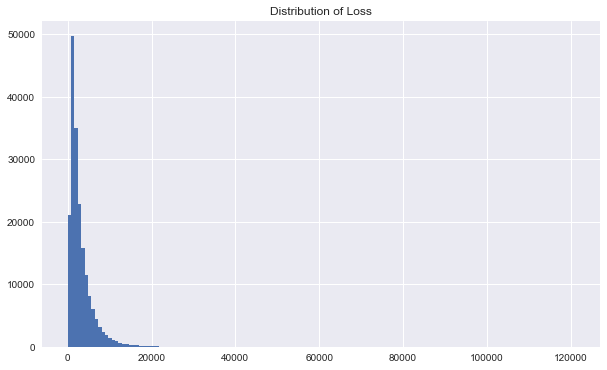

In [11]:
fig = plt.figure(figsize = (10,6))
plt.hist(label, bins=150)
plt.title("Distribution of Loss")
plt.show()

* Comments: we can see that the labels are very skewed.

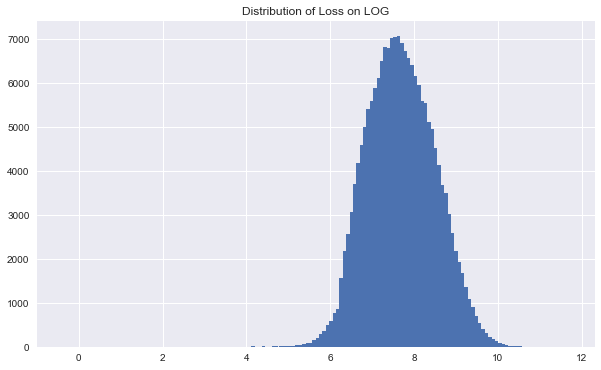

In [12]:
## lets transform the loss to log
fig = plt.figure(figsize = (10,6))
plt.hist(np.log(label), bins=150)
plt.title("Distribution of Loss on LOG")
plt.show()

* Comment: The log of loss seems better. 

## 2. Data Visualization
* Box and density plots on continous features

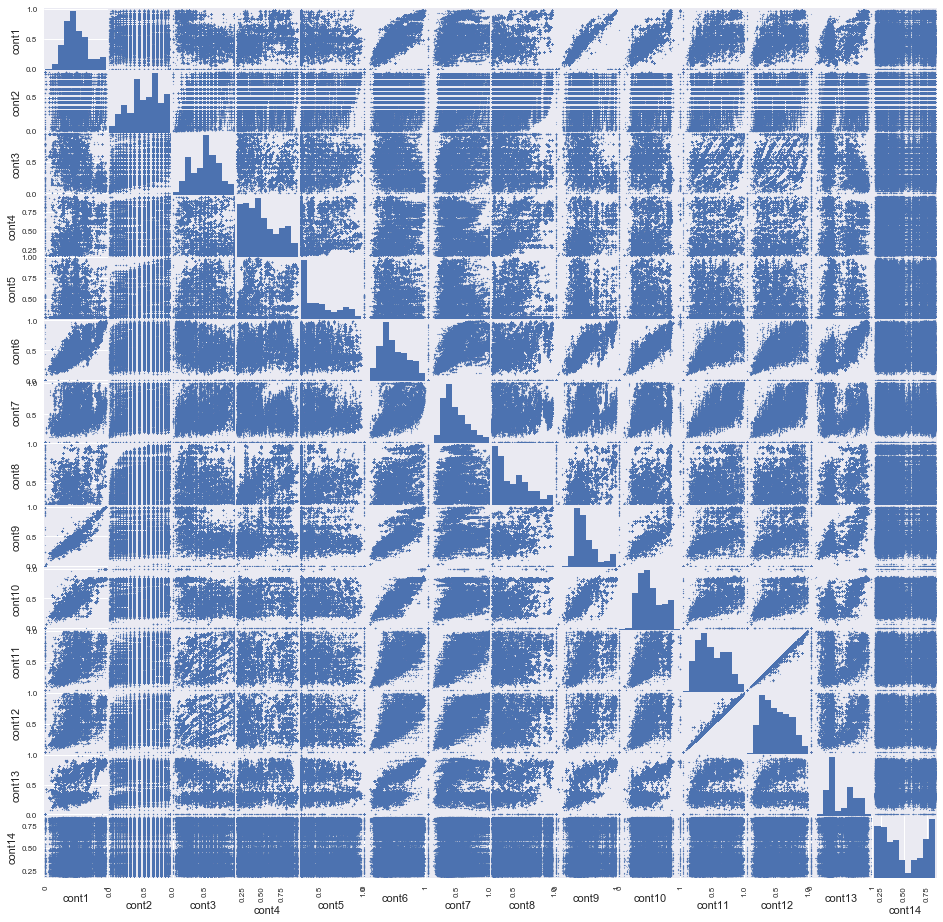

In [159]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix (train_test[con], s=3, figsize=(16, 16))
plt.show()

## Comment on the scatter matrix plot, we can see that there are some linear correlations among some variables. Such as between cont 11 with 12, cont 9, 6, 8 with 1, etc. We would like to see more clear distribution for individual continuous variables below

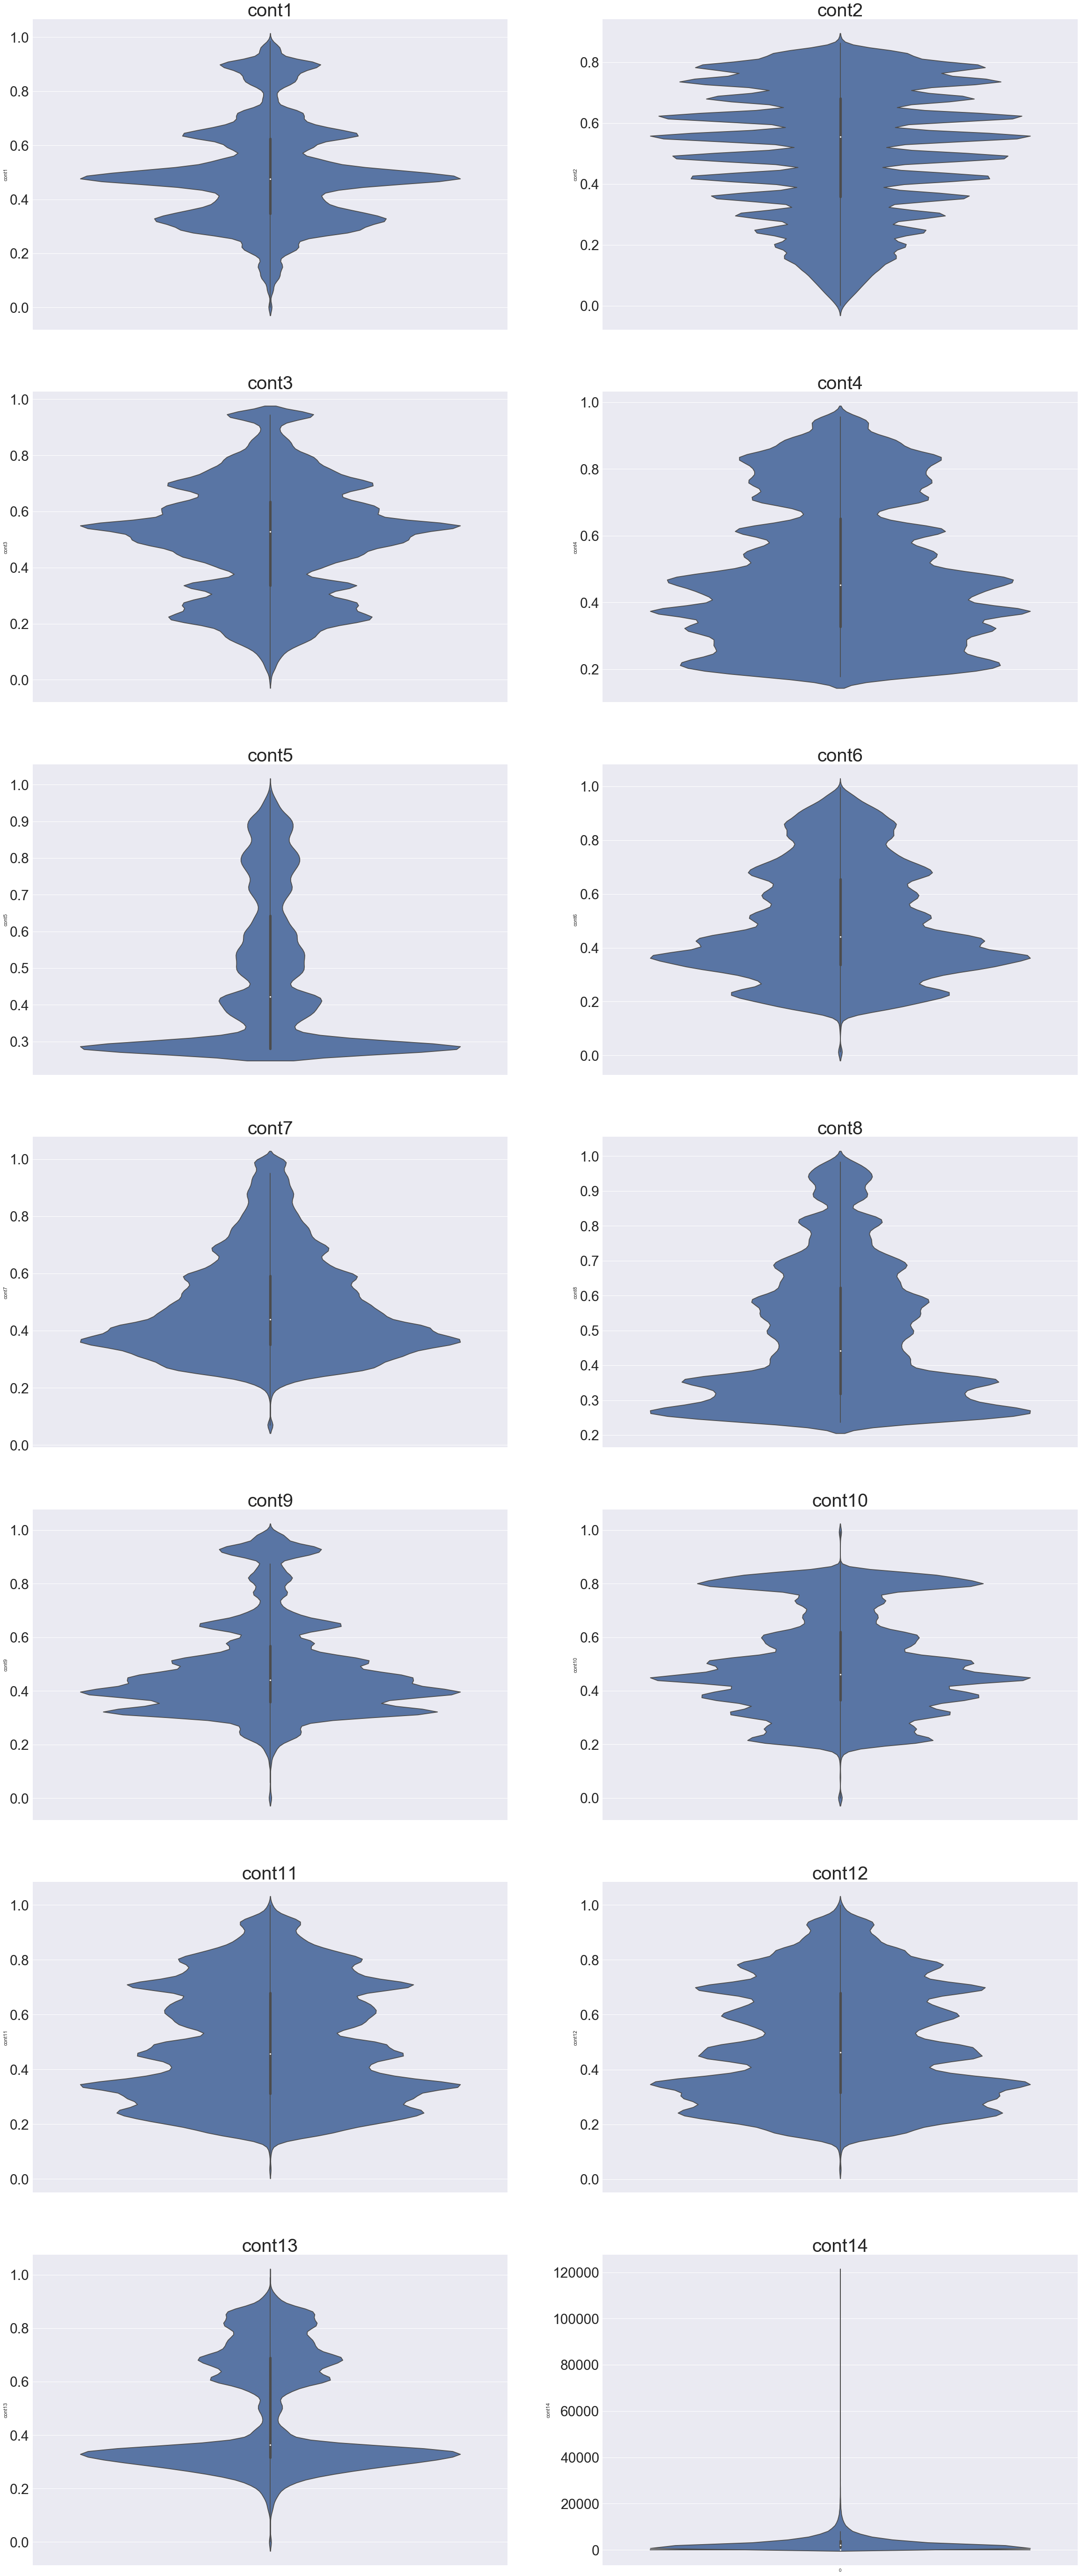

In [153]:
fig = plt.figure(figsize=(40,100))
for i,j in enumerate(con):
    ax = fig.add_subplot(len(con)/2,2,i+1)
    sns.violinplot(data = train_test[con], y = str(j))
    plt.title("{}".format(j), fontsize=40)
    
    # set label size as easier to read
    ax.yaxis.set_tick_params(labelsize=30)


## Comments on the violin plot:

1. cont 5, cont 13 clusters at value 0.3
2. cont 11 and cont 12 are similiar 
3. cont 1 clusters at value 0.5
4. cont 2 has a spiky value at certain points
5. cont 14 has more points at both ends

* bar plot on categorical data

In [161]:
len(cat)

116

In [165]:
fig = plt.figure(figsize=(40,400))
for i, j in enumerate(cat):
    ax = fig.add_subplot(len(cat)/2,2,i+1)
    train_test[j].value_counts().plot.bar()
    plt.title(j, fontsize = 35)
    ax.xaxis.set_tick_params(labelsize=30)
    ax.yaxis.set_tick_params(labelsize=20)

## Comments on the bar plot(histogram):
* Features 1-72 only contains A OR B values, then most of them have more As than Bs.
* Other features contains more than 2 values

## 3. Transformation

### Continuous Features
* Correction of skewness on continuous features: Use Boxcox

In [12]:
from scipy.stats import skew, boxcox
# revisit the train_test skewness 
skewness = train_test.skew()

In [13]:
skewed_cols = skewness[skewness.values > 0.25].index

for skewed_col in skewed_cols:
    train_test[skewed_col], _ = boxcox(train_test[skewed_col] + 1)

* scale the continuous data, standardscaler

In [14]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
SSL = StandardScaler()

for i in con:
    train_test[i] = SSL.fit_transform(train_test[i].values.reshape(-1,1))

### LabelEncoding & OneHotEncoding on Categorical Features

In [15]:
%%timeit
LBL = LabelEncoder()
LBL_map = {}
for i in cat:
    train_test[i] = LBL.fit_transform(train_test[i])
    LBL_map[i] = dict(zip(LBL.classes_, LBL.transform(LBL.classes_)))

The slowest run took 21.05 times longer than the fastest. This could mean that an intermediate result is being cached.
1 loop, best of 3: 2.44 s per loop


In [16]:
OHE = OneHotEncoder(sparse=True)
train_test_sparse = OHE.fit_transform(train_test[cat])

In [17]:
train_test_sparse.shape # before stack with the continuous features

(313864, 1176)

# Modeling: 

Gradient Boosting regression
and XGBoosting

In [18]:
from scipy import sparse
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
from sklearn.model_selection import train_test_split

train_test_sparse = sparse.hstack((train_test_sparse, train_test[con]), format='csr')
print (train_test_sparse.shape)

(313864, 1190)


In [19]:
## Gradient Boosting regression
X = train_test_sparse[:train.shape[0]]
test_X = train_test_sparse[train.shape[0]:]

In [21]:
Y = np.log(label)

In [22]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 100 )

In [24]:
rgr = xgb.XGBRegressor(seed = 1234, 
                       learning_rate = 0.01, # smaller, better results, more time
                       n_estimators = 1500, # Number of boosted trees to fit.
                       max_depth=9, # the maximum depth of a tree
                       min_child_weight=50,
                       colsample_bytree=0.67, # the fraction of columns to be randomly samples for each tree
                       subsample=0.78, # the fraction of observations to be randomly samples for each tree
                       gamma=0.9, # Minimum loss reduction required to make a further partition on a leaf node of the tree, 
                       # the larger, the more conservative 
                       nthread = -1, # Number of parallel threads used to run xgboost.
                       silent = False # Whether to print messages while running boosting.
                      )
rgr.fit(x_train, y_train)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.67,
       gamma=0.9, learning_rate=0.01, max_delta_step=0, max_depth=9,
       min_child_weight=50, missing=None, n_estimators=1500, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=1234, silent=False, subsample=0.78)

In [44]:
y_pred_rgr = rgr.predict(x_test)

In [76]:
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
GBR = GradientBoostingRegressor(**params)
GBR.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=500,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

In [79]:
y_pred = GBR.predict(x_test.toarray())
GBR.score(x_test.toarray(), y_test)

0.49718144187827068

In [83]:
test_result = pd.DataFrame()
test_result['id'] = Y[train.shape[0]:]
test_result['loss'] = y_pred
#results.to_csv("output/sub.csv", index=False)
print ("Submission created.")

Submission created.
